In [2]:
# ╔══════════════════════════════════════════╗
# ║  Cell 1 – импорт и загрузка метаданных   ║
# ╚══════════════════════════════════════════╝
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

TRACK_CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

tracks = pd.read_csv(TRACK_CSV, header=[0, 1], index_col=0)
genre_col = tracks[("track", "genre_top")]

print("Всего треков в выборке:", len(genre_col))
print("Уникальных жанров:", genre_col.nunique())
print()
print("Топ-10 жанров по количеству треков:")
print(genre_col.value_counts().head(10))


Всего треков в выборке: 106574
Уникальных жанров: 16

Топ-10 жанров по количеству треков:
(track, genre_top)
Rock             14182
Experimental     10608
Electronic        9372
Hip-Hop           3552
Folk              2803
Pop               2332
Instrumental      2079
International     1389
Classical         1230
Jazz               571
Name: count, dtype: int64


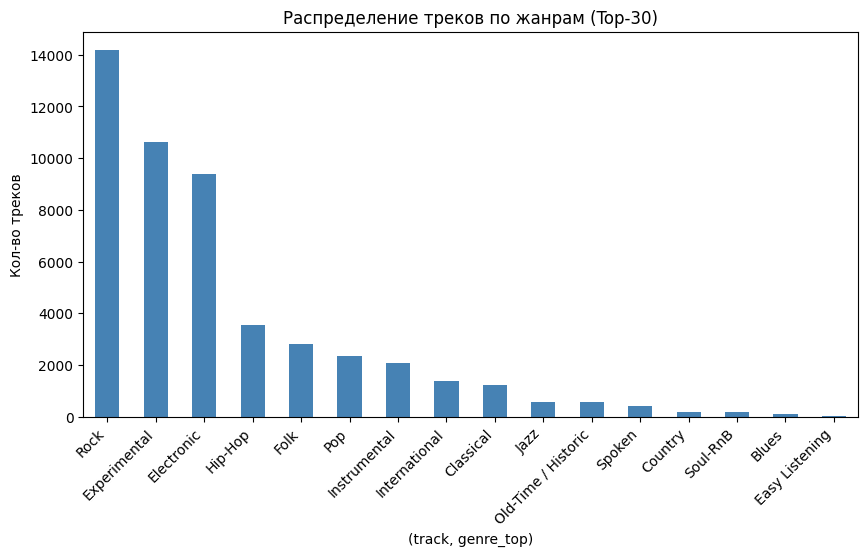

In [3]:
# ╔══════════════════════════════════════════╗
# ║  Cell 2 – Гистограмма распределения     ║
# ╚══════════════════════════════════════════╝
plt.figure(figsize=(10,5))
genre_col.value_counts().plot(kind="bar", color="steelblue")
plt.title("Распределение треков по жанрам (Top-30)")
plt.ylabel("Кол-во треков")
plt.xticks(rotation=45, ha="right")
plt.show()


In [25]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

TRACK_CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

# ── 1. читаем файл целиком (55-70 МБ) ───────────────────────────────
df = pd.read_csv(TRACK_CSV, header=[0, 1], index_col=0, low_memory=False)

# ── 2. вытаскиваем нужные level-0/level-1 колонки ───────────────────
want = [
    ("track", "genre_top"),
    ("track", "duration"),
    ("track", "loudness"),
]
tracks = df[want].copy()

# делаем «плоские» названия: genre, duration, loudness
tracks.columns = ["genre", "duration", "loudness"]

print(tracks.head())


KeyError: "[('track', 'loudness')] not in index"

In [27]:
import pandas as pd
CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

hdr = pd.read_csv(CSV, header=[0, 1], nrows=0).columns
track_cols = [c[1] for c in hdr if c[0] == "track"]
print("track-подполя:", track_cols[:25], "…")


track-подполя: ['bit_rate', 'comments', 'composer', 'date_created', 'date_recorded', 'duration', 'favorites', 'genre_top', 'genres', 'genres_all', 'information', 'interest', 'language_code', 'license', 'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'] …


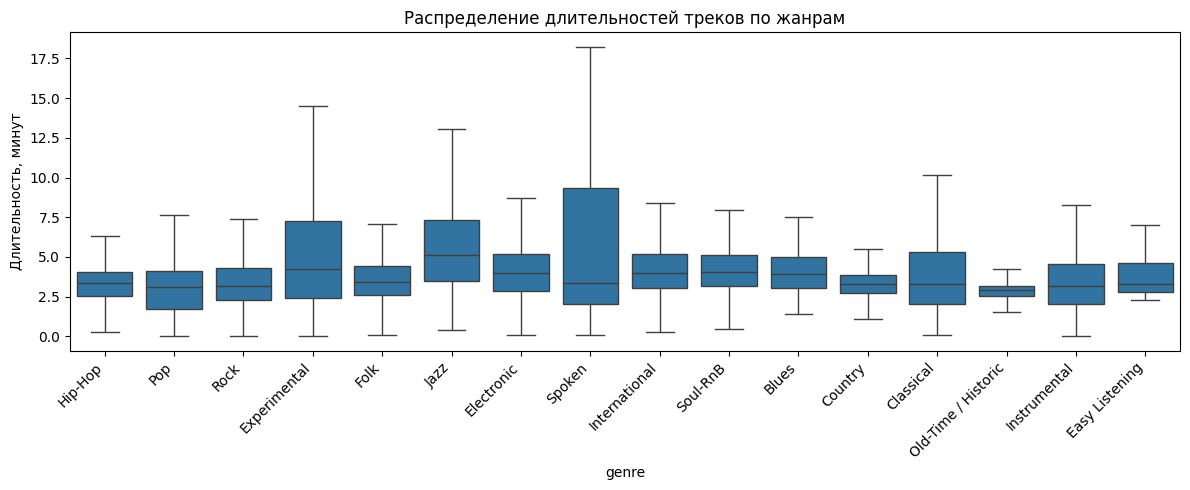

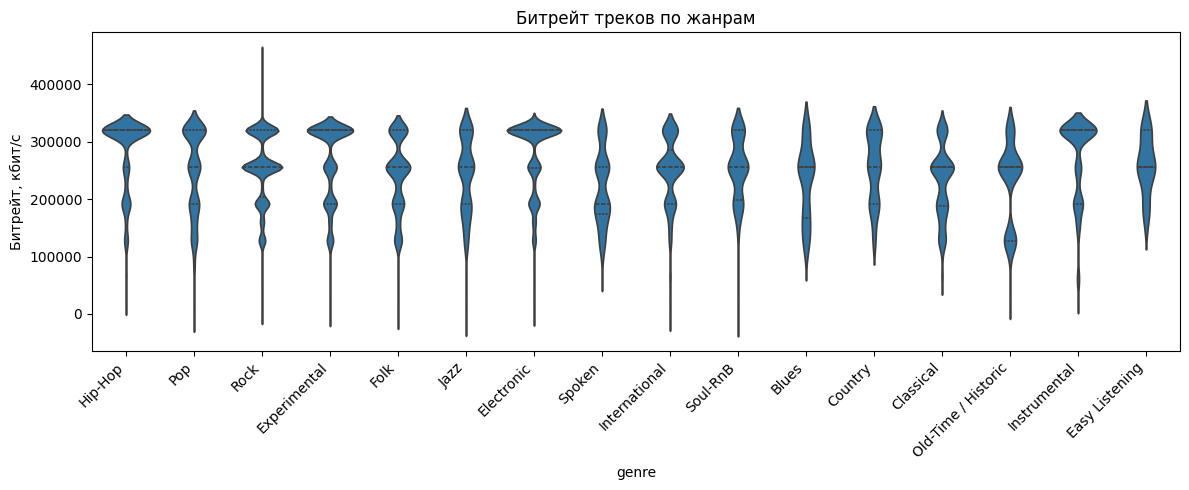

In [29]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

# 1. читаем файл целиком (≈ 55 МБ для fma_large)  ────────────────────
df = pd.read_csv(CSV, header=[0, 1], index_col=0, low_memory=False)

# 2. берём только под-поля track/… которые нужны ----------------------
need = ["genre_top", "duration", "bit_rate"]          # ← заменяйте/добавляйте здесь
tracks = df.loc[:, ("track", need)].copy()            # выбираем столбцы
tracks.columns = tracks.columns.droplevel(0)          # genre_top → genre_top …

# 3. переименуем покороче и отфильтруем пропуски ----------------------
tracks = (
    tracks.rename(columns={"genre_top": "genre"})     # проще имя
          .dropna(subset=["genre", "bit_rate"])       # убираем пустые
)

# 4️⃣ box-plot длительностей (в минутах) ------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=tracks, x="genre", y=tracks["duration"] / 60, showfliers=False)
plt.ylabel("Длительность, минут")
plt.title("Распределение длительностей треков по жанрам")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5️⃣ violin-plot битрейта -------------------------------------------
plt.figure(figsize=(12, 5))
sns.violinplot(data=tracks, x="genre", y="bit_rate", inner="quartile")
plt.ylabel("Битрейт, кбит/с")
plt.title("Битрейт треков по жанрам")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


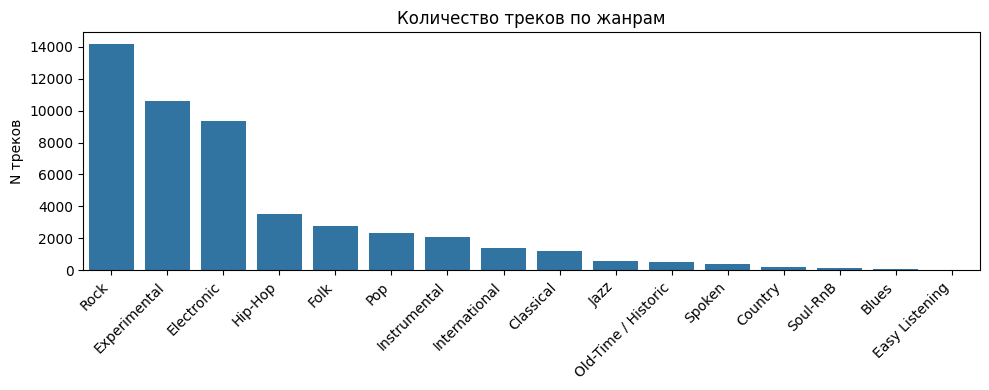

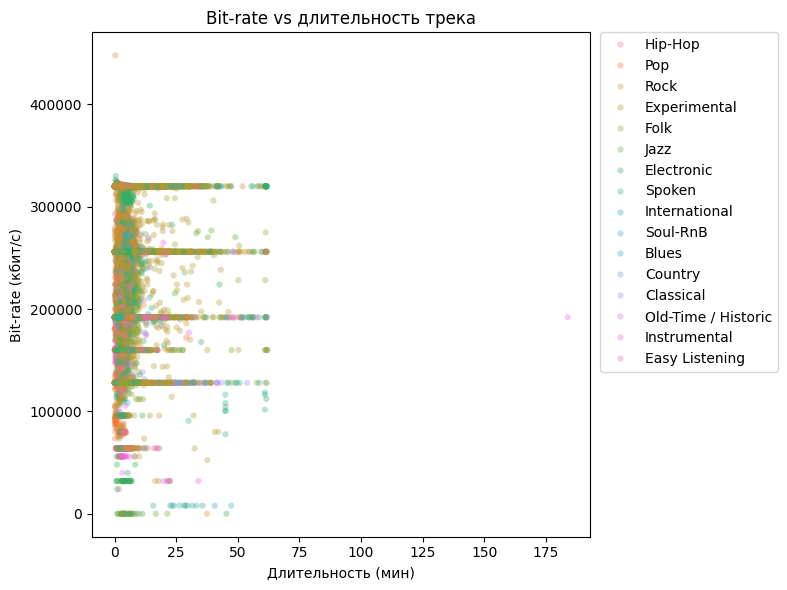

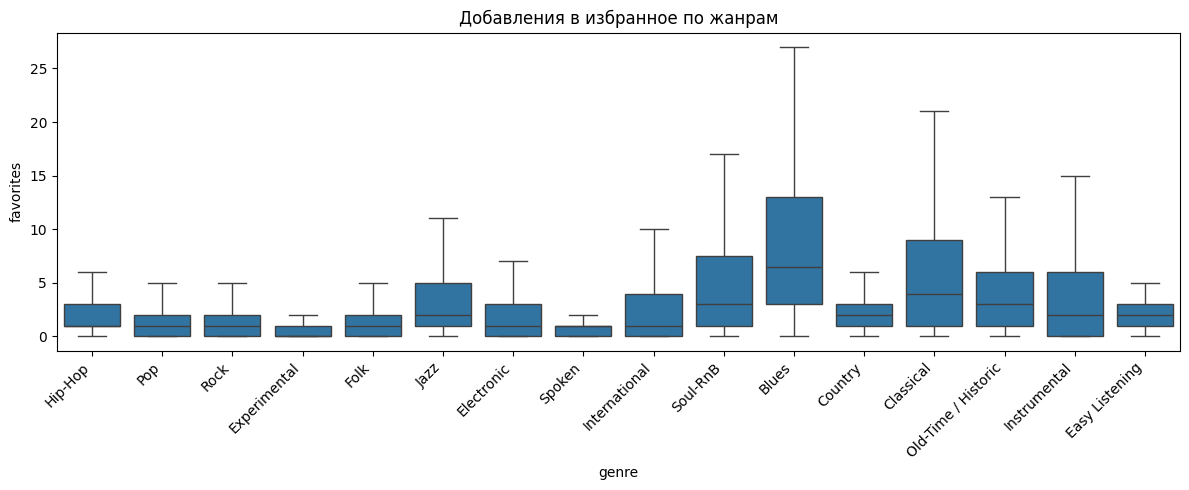

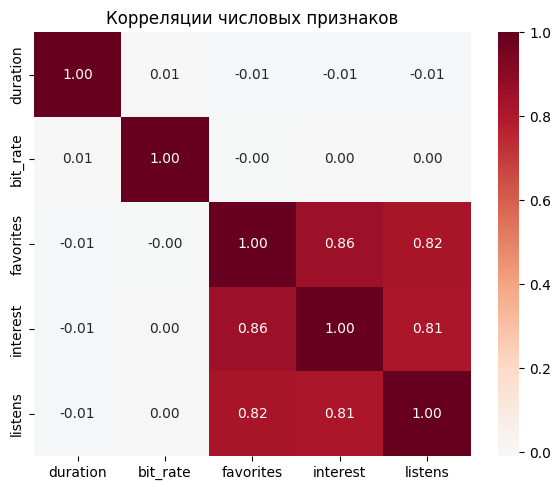

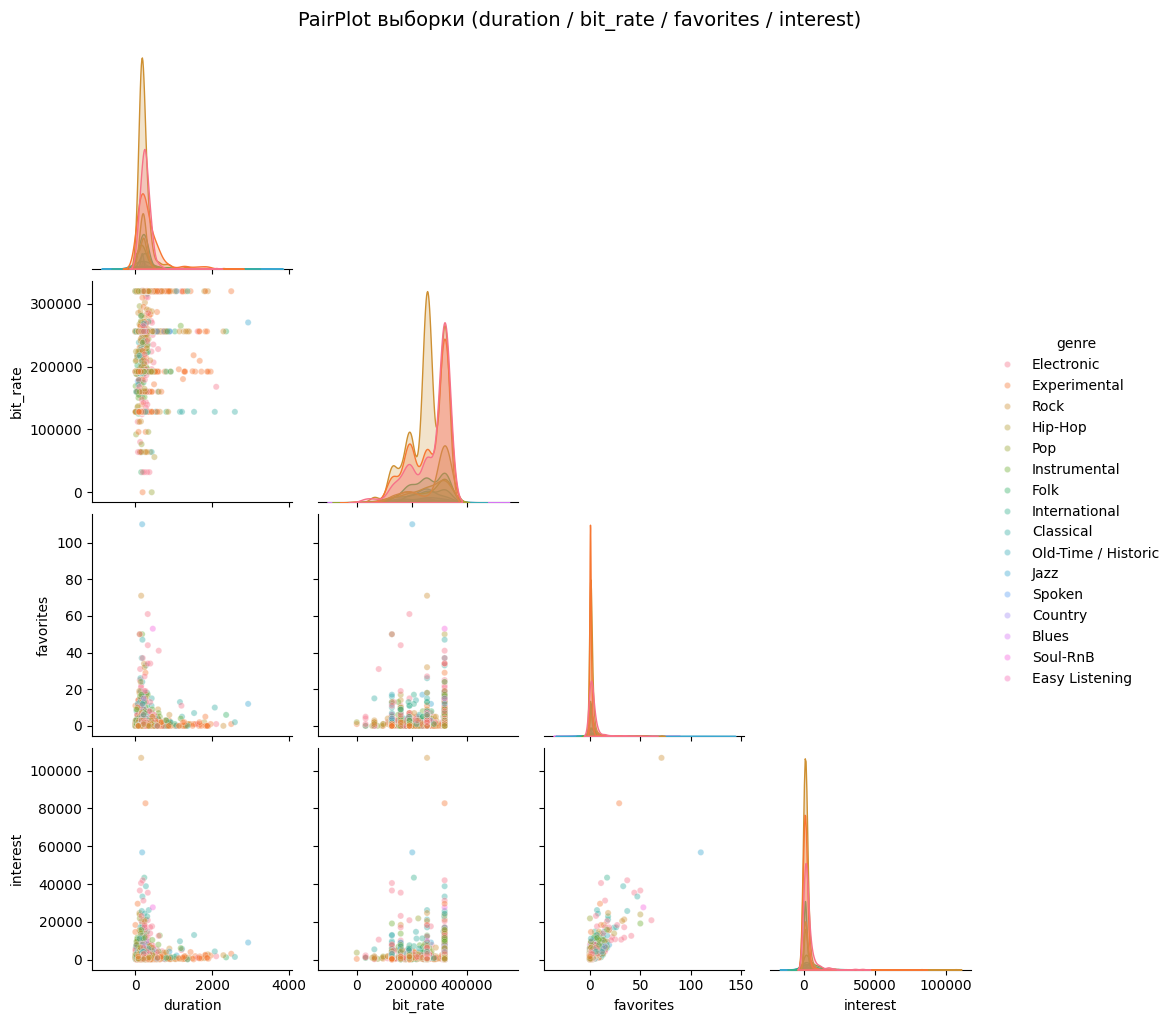

In [30]:
# ╔══════════════════════════════════════╗
# ║   Cell 0 – загрузка данных           ║
# ╚══════════════════════════════════════╝
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

df = pd.read_csv(CSV, header=[0, 1], index_col=0, low_memory=False)

# ── нужные столбцы ──────────────────────────────────────────────────
need_cat = ["genre_top"]                # категориальные
need_num = ["duration", "bit_rate", "favorites", "interest", "listens"]

tracks = df.loc[:, ("track", need_cat + need_num)].copy()
tracks.columns = tracks.columns.droplevel(0)
tracks = tracks.rename(columns={"genre_top": "genre"})
tracks = tracks.dropna(subset=["genre"])         # оставим только треки с жанром

# ╔══════════════════════════════════════╗
# ║   Cell 1 – Кол-во треков по жанрам   ║
# ╚══════════════════════════════════════╝
plt.figure(figsize=(10,4))
order = tracks["genre"].value_counts().index
sns.countplot(data=tracks, x="genre", order=order)
plt.title("Количество треков по жанрам")
plt.xticks(rotation=45, ha="right")
plt.ylabel("N треков"); plt.xlabel("")
plt.tight_layout(); plt.show()


# ╔═════════════════════════════════════════════╗
# ║   Cell 2 – scatter: длина ↔ bitrate         ║
# ╚═════════════════════════════════════════════╝
plt.figure(figsize=(8,6))
sns.scatterplot(data=tracks, x=tracks["duration"]/60, y="bit_rate",
                hue="genre", alpha=0.35, s=20, linewidth=0)
plt.xlabel("Длительность (мин)")
plt.ylabel("Bit-rate (кбит/с)")
plt.title("Bit-rate vs длительность трека")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout(); plt.show()


# ╔══════════════════════════════════════════╗
# ║   Cell 3 – box-plot 'favorites' по жанрам ║
# ╚══════════════════════════════════════════╝
if "favorites" in tracks.columns and tracks["favorites"].notna().any():
    plt.figure(figsize=(12,5))
    sns.boxplot(data=tracks, x="genre", y="favorites", showfliers=False)
    plt.title("Добавления в избранное по жанрам")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()


# ╔═════════════════════════════════════════════╗
# ║   Cell 4 – корреляционная тепловая карта    ║
# ╚═════════════════════════════════════════════╝
corr = tracks[need_num].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Корреляции числовых признаков")
plt.tight_layout(); plt.show()


# ╔═════════════════════════════════════════════╗
# ║   Cell 5 – PairPlot (сэмпл 2 000 треков)    ║
# ╚═════════════════════════════════════════════╝
sample = tracks.sample(n=min(2000, len(tracks)), random_state=42)
sns.pairplot(sample, vars=["duration", "bit_rate", "favorites", "interest"],
             hue="genre", corner=True, plot_kws=dict(alpha=.4, s=20))
plt.suptitle("PairPlot выборки (duration / bit_rate / favorites / interest)",
             y=1.02, fontsize=14)
plt.show()
